ContinuousCascade
Runs a cascade of two computational units in the style of Egger et. al., but designed such that both units opperate simultaneouly. The goal is to study what the patterns of input required to achieve updating behavior without assuming au fait transitions between computational units.

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize
import os
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

Definte parameters

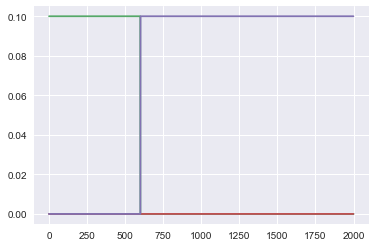

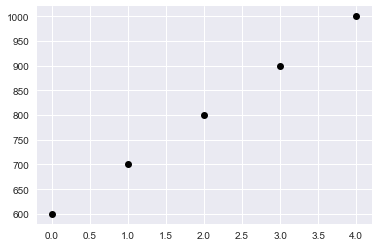

In [82]:
# Common parameters used for the entire file
epsis0 = np.zeros((1,2000))
#epsis0[0,0:1000] = 0.1;
epsis1 = np.zeros((1,2000))
epsis1[0,0:600] = 0.1;
epsis2 = np.zeros((1,2000))
#epsis2[0,1001:2000] = 0.1;
epsis3 = np.zeros((1,2000))
epsis3[0,601:2000] = 0.1;
epsis = np.matrix(np.concatenate((epsis0,epsis1,epsis2,epsis3), axis=0))
#epsis[0:1,0:1000] = 0.1
#epsis[2:4,1001:2000] = 0.1
param_dict = {'W': np.matrix('0 -1 0 0; -1 0 0 0; -0.1 0.1 0 -1; -0.1 0.1 -1 0')*10,
              'tau': 150, 'dt': 1}

state_dict = {'x': np.matrix('1; 0; 1; 0')}
plt.figure
plt.plot(np.asarray(epsis.T))
plt.show()

# t_s
ts_lst = np.linspace(600,1000, num=5)
plt.figure
plt.plot(ts_lst,'ko')
plt.show()

Define functions

In [83]:
def thresh_exp(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

def find_dx(state, epsi, It, params):
    '''Returns dx/dt given the parameters and current state'''
    W = params['W']
    tau = params['tau']
    
    x = state
    dx = (-x + thresh_exp(W * x + epsi + It)) / tau
    return dx

def update_x(state, epsi, It, params):
    '''Update u based on params'''
    nextState = state
    nextState += find_dx(state, epsi, It, params) * params['dt']
    return nextState

def simulate_x(state_init, epsis, I0, params, niter):
    '''Simulate for niter iterations'''
    curr_state = state_init
    x_lst = state_init
    
    for i in range(niter):
        epsi = epsis[0:4,i]
        It = I0[0:4,i];
        curr_state = update_x(curr_state, epsi, It, params)
        x_lst = np.append(x_lst,curr_state, axis=1)
        
    return x_lst

Now lets try runing it for a few iterations

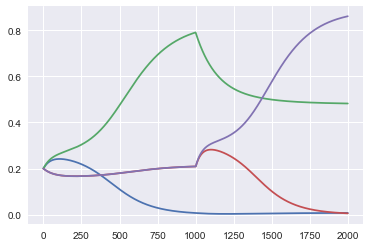

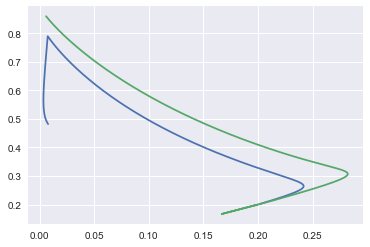

In [86]:
x_init = np.matrix('0.2; 0.2; 0.2; 0.2')


I00 = np.zeros((1,2001), dtype = float)
I00[0,0:tsInt] = 1.5;
I01 = np.zeros((1,2001), dtype = float)
I01[0,0:tsInt] = 1.5;
I02 = np.zeros((1,2001), dtype = float)
I02[0,(tsInt+1):2001] = 1.5;
I03 = np.zeros((1,2001), dtype = float)
I03[0,(tsInt+1):2001] = 1.5;
I0 = np.matrix(np.concatenate((I00,I01,I02,I03), axis=0))
    
x_lst = simulate_x(x_init, epsis, I0, param_dict, niter=2000)
plt.figure
plt.plot(np.asarray(x_lst.T))
#plt.plot(np.asarray(x_lst[0,].T))
#plt.plot(np.asarray(x_lst[1,].T))
#plt.plot(np.asarray(x_lst[2,].T))
#plt.plot(np.asarray(x_lst[3,].T))
plt.show()

plt.figure
plt.plot(np.asarray(x_lst[0,].T),np.asarray(x_lst[1,].T))
plt.plot(np.asarray(x_lst[2,].T),np.asarray(x_lst[3,].T))
plt.show()

Now lets try different values of _t<sub>s</sub>_

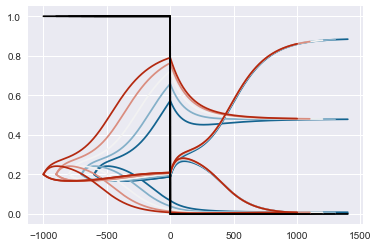

In [85]:
tsVec = np.matrix(np.linspace(0,2000,2001))
col_lst = sns.diverging_palette(240, 15, s=95, l=40,
                                n=5, center="light")
for j in range(0, 5):
    tsInt = int(ts_lst[j])
    epsis0 = np.zeros((1,2001), dtype=float)
    #epsis0[0,0:tsInt] = 0.1;
    #epsis0[0,tsInt+1:2001] = -0.5;
    epsis1 = np.zeros((1,2001), dtype=float)
    epsis1[0,0:tsInt] = 0.1;
    #epsis1[0,(tsInt+1):2001] = -0.5;
    epsis2 = np.zeros((1,2001), dtype=float)
    #epsis2[0,tsInt+1:2000] = -0.2;
    epsis3 = np.zeros((1,2001), dtype=float)
    epsis3[0,tsInt+1:2001] = 0.1;
    epsis = np.matrix(np.concatenate((epsis0,epsis1,epsis2,epsis3), axis=0))
    
    I00 = np.zeros((1,2001), dtype = float)
    I00[0,0:tsInt] = 1.5;
    I01 = np.zeros((1,2001), dtype = float)
    I01[0,0:tsInt] = 1.5;
    I02 = np.zeros((1,2001), dtype = float)
    I02[0,(tsInt+1):2001] = 1.5;
    I03 = np.zeros((1,2001), dtype = float)
    I03[0,(tsInt+1):2001] = 1.5;
    I0 = np.matrix(np.concatenate((I00,I01,I02,I03), axis=0))

    
    x_init = np.matrix('0.2; 0.2; 0.2; 0.2')
    x_lst = simulate_x(x_init, epsis, I0, param_dict, niter=2000)
    #plt.figure
    plt.plot(np.tile(tsVec.T,(1, 4))-ts_lst[j],np.asarray(x_lst.T),color=col_lst[j])
    plt.plot(tsVec.T-ts_lst[j],10*epsis[1,].T,'k')
    #plt.plot(np.asarray(x_lst[0,].T))
    #plt.plot(np.asarray(x_lst[1,].T))
    #plt.plot(np.asarray(x_lst[2,].T))
    #plt.plot(np.asarray(x_lst[3,].T))
    #plt.show()

    #plt.figure
    #plt.plot(np.asarray(x_lst[0,].T),np.asarray(x_lst[1,].T))
    #plt.plot(np.asarray(x_lst[2,].T),np.asarray(x_lst[3,].T))
    #plt.show()

Ok, that seems to have failed. The main problem is that, by including the interaction term between computational units in the weight matrix W, it creats _t<sub>s</sub>_ related changes in initial conditions in the second computational unit, masking speed related changes and leading to similar timing behavior, regardless of _t<sub>s</sub>_. So, I think that means we learned something! We need to hold those changes consant. This can be achieved in at least 2 ways:

(1) Break out the calculation of error to its own unit (as in original versions of the cascade), and inhibit that unit
(2) Selectively put inhibition into second computational unit. We'll start here.

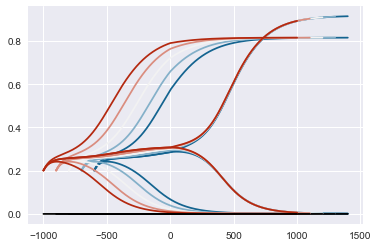

In [105]:
tsVec = np.matrix(np.linspace(0,2000,2001))
col_lst = sns.diverging_palette(240, 15, s=95, l=40,
                                n=5, center="light")

param_dict = {'W': np.matrix('0 -1 0 0; -1 0 0 0; -0.1 0.1 0 -1; -0.1 0.1 -1 0')*10,
              'tau': 150, 'dt': 1}

for j in range(0, 5):
    tsInt = int(ts_lst[j])
    epsis0 = np.zeros((1,2001), dtype=float)
#     epsis0[0,0:tsInt] = 0.1;
    #epsis0[0,tsInt+1:2001] = 0.1;
    epsis1 = np.zeros((1,2001), dtype=float)
    epsis1[0,0:tsInt] = 0.1;
#     epsis1[0,tsInt:2001] = 0.1;
    epsis2 = np.zeros((1,2001), dtype=float)
    #epsis2[0,tsInt+1:2000] = -0.2;
    epsis3 = np.zeros((1,2001), dtype=float)
    epsis3[0,tsInt+1:2001] = 0.1;
    epsis = np.matrix(np.concatenate((epsis0,epsis1,epsis2,epsis3), axis=0))
    
#     I00 = np.zeros((1,2001), dtype = float)
#     I00[0,0:tsInt] = 1.5;
#     I01 = np.zeros((1,2001), dtype = float)
#     I01[0,0:tsInt] = 1.5;
#     I02 = np.zeros((1,2001), dtype = float)
#     I02[0,(tsInt+1):2001] = 1.5;
#     I03 = np.zeros((1,2001), dtype = float)
#     I03[0,(tsInt+1):2001] = 1.5;
#     I0 = np.matrix(np.concatenate((I00,I01,I02,I03), axis=0))
    I0 = np.matrix(np.ones((4,2001))*1.5);

    x_init = np.matrix('0.2; 0.2; 0.2; 0.2')
    x_lst = simulate_x(x_init, epsis, I0, param_dict, niter=2000)
    plt.figure
    #plt.plot(x_lst[2,].T,x_lst[3,].T, color=col_lst[j])
    plt.plot(np.tile(tsVec.T,(1, 4))-ts_lst[j],np.asarray(x_lst.T),color=col_lst[j])
    plt.plot(tsVec.T-ts_lst[j],10*epsis[0,].T,'k')
